# Assignment 5, Question 4: Data Exploration

**Points: 15**

In this notebook, you'll explore the clinical trial dataset using pandas selection and filtering techniques.

You'll use utility functions from `q3_data_utils` where helpful, but also demonstrate direct pandas operations.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities from Q3
from q3_data_utils import load_data, detect_missing, filter_data

# Load the data
df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients with {len(df.columns)} variables")

# Prewritten visualization functions for exploration
def plot_value_counts(series, title, figsize=(10, 6)):
    """
    Create a bar chart of value counts.
    
    Args:
        series: pandas Series with value counts
        title: Chart title
        figsize: Figure size tuple
    """
    plt.figure(figsize=figsize)
    series.plot(kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_crosstab(crosstab_data, title, figsize=(10, 6)):
    """
    Create a heatmap of crosstab data.
    
    Args:
        crosstab_data: pandas DataFrame from pd.crosstab()
        title: Chart title
        figsize: Figure size tuple
    """
    plt.figure(figsize=figsize)
    plt.imshow(crosstab_data.values, cmap='Blues', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xticks(range(len(crosstab_data.columns)), crosstab_data.columns, rotation=45)
    plt.yticks(range(len(crosstab_data.index)), crosstab_data.index)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients with 18 variables


## Part 1: Basic Exploration (3 points)

Display:
1. Dataset shape
2. Column names and types
3. First 10 rows
4. Summary statistics (.describe())

In [2]:
# TODO: Display dataset info
display(df.shape)
display(df.columns, df.dtypes)
display(df.head(n=10))
display(df.describe())

(10000, 18)

Index(['patient_id', 'age', 'sex', 'bmi', 'enrollment_date', 'systolic_bp',
       'diastolic_bp', 'cholesterol_total', 'cholesterol_hdl',
       'cholesterol_ldl', 'glucose_fasting', 'site', 'intervention_group',
       'follow_up_months', 'adverse_events', 'outcome_cvd', 'adherence_pct',
       'dropout'],
      dtype='object')

patient_id             object
age                     int64
sex                    object
bmi                   float64
enrollment_date        object
systolic_bp           float64
diastolic_bp          float64
cholesterol_total     float64
cholesterol_hdl       float64
cholesterol_ldl       float64
glucose_fasting       float64
site                   object
intervention_group     object
follow_up_months        int64
adverse_events          int64
outcome_cvd            object
adherence_pct         float64
dropout                object
dtype: object

,patient_id,age,sex,bmi,enrollment_date,systolic_bp,diastolic_bp,cholesterol_total,cholesterol_hdl,cholesterol_ldl,glucose_fasting,site,intervention_group,follow_up_months,adverse_events,outcome_cvd,adherence_pct,dropout
0,P00001,80,F,29.3,2022-05-01,123.0,80.0,120.0,55.0,41.0,118.0,site b,Control,20,0,No,24.0,No
1,P00002,80,Female,NaN,2022-01-06,139.0,81.0,206.0,58.0,107.0,79.0,Site A,CONTROL,24,0,No,77.0,No
2,P00003,82,Female,-1.0,2023-11-04,123.0,86.0,172.0,56.0,82.0,77.0,SITE C,treatment b,2,0,Yes,70.0,No
3,P00004,95,Female,25.4,2022-08-15,116.0,77.0,200.0,56.0,104.0,115.0,Site D,treatment b,17,0,No,62.0,No
4,P00005,95,M,NaN,2023-04-17,97.0,71.0,185.0,78.0,75.0,113.0,site e,Treatmen A,9,0,yes,NaN,Yes
5,P00006,78,F,26.8,2023-08-29,116.0,66.0,164.0,54.0,99.0,99.0,Site A,TreatmentA,4,0,yes,NaN,Yes
6,P00007,84,F,25.4,2022-05-12,133.0,100.0,215.0,62.0,113.0,70.0,site a,treatment a,20,1,No,76.0,No
7,P00008,70,Male,24.7,2022-06-04,111.0,72.0,174.0,60.0,94.0,109.0,SITE B,TREATMENT A,19,0,No,53.0,No
8,P00009,92,Female,26.9,2022-04-06,NaN,NaN,189.0,62.0,89.0,103.0,site a,Control,21,0,yes,53.0,No
9,P00010,75,Male,21.1,2023-12-14,128.0,76.0,218.0,77.0,97.0,96.0,SITE A,Treatment B,1,0,No,50.0,No


,age,bmi,systolic_bp,diastolic_bp,cholesterol_total,cholesterol_hdl,cholesterol_ldl,glucose_fasting,follow_up_months,adverse_events,adherence_pct
count,10000.000000,9562.000000,9586.000000,9586.000000,9446.000000,9446.000000,9446.000000,9631.000000,10000.00000,10000.000000,8533.000000
mean,59.182700,25.730558,117.531087,73.550908,178.039488,61.369786,85.698603,96.424255,12.25460,0.145500,60.615610
std,151.769963,5.339547,13.973973,10.167464,33.129034,11.062101,28.686463,17.112961,7.07675,0.393631,18.974399
min,-999.000000,-1.000000,75.000000,60.000000,91.000000,25.000000,40.000000,51.000000,0.00000,0.000000,20.000000
25%,70.000000,23.500000,108.000000,65.000000,155.000000,54.000000,65.000000,84.000000,6.00000,0.000000,47.000000
50%,80.000000,26.000000,117.000000,73.000000,177.000000,61.000000,84.000000,96.000000,12.00000,0.000000,62.000000
75%,92.000000,28.775000,127.000000,81.000000,200.000000,69.000000,105.000000,108.000000,19.00000,0.000000,75.000000
max,100.000000,42.800000,173.000000,118.000000,315.000000,98.000000,226.000000,163.000000,24.00000,4.000000,100.000000


## Part 2: Column Selection (3 points)

Demonstrate different selection methods:

1. Select only numeric columns using `.select_dtypes()`
2. Select specific columns by name
3. Select a subset of rows and columns using `.loc[]`

In [ ]:
# TODO: Select numeric columns
numeric-data = df.select_dtypes(include=['number'])


In [ ]:
# TODO: Select specific columns
specific-data = df['bmi']

In [13]:
# TODO: Use .loc[] to select subset
subset = df.loc[15:35, 'bmi']
display(subset)

15    30.0
16    29.6
17    23.2
18    24.6
19    24.0
20    28.9
21    24.9
22    33.3
23    24.9
24    23.6
25    22.9
26    24.3
27    27.8
28    24.6
29    28.5
30    28.1
31    23.4
32    22.3
33    37.1
34    34.4
35    28.2
Name: bmi, dtype: float64

## Part 3: Filtering (4 points)

Filter the data to answer these questions:

1. How many patients are over 65 years old?
2. How many patients have systolic BP > 140?
3. Find patients who are both over 65 AND have systolic BP > 140
4. Find patients from Site A or Site B using `.isin()`

In [ ]:
# TODO: Filter and count patients over 65
# 1. Use the filter_data utility from Q3
# 2. Create a filter for age > 65
# 3. Apply the filter and count the results
# print(f"Patients over 65: {len(patients_over_65)}")


In [ ]:
# TODO: Filter for high BP
# 1. Use the filter_data utility from Q3
# 2. Create a filter for systolic_bp > 140
# 3. Apply the filter and count the results
# print(f"Patients with high BP: {len(high_bp)}")


In [ ]:
# TODO: Multiple conditions with &
# 1. Use filter_data for multiple conditions:
# 2. Create filters for both conditions:
#     {'column': 'age', 'condition': 'greater_than', 'value': 65},
#     {'column': 'systolic_bp', 'condition': 'greater_than', 'value': 140}
# ]
# 3. Apply the filter and count the results
# print(f"Patients over 65 AND high BP: {len(both_conditions)}")
#
# 5. Alternative: Use in_range for age range:
# 5. Create filter for age range 65-100
# 6. Apply the filter and count the results


In [ ]:
# TODO: Filter by site using .isin()
# 1. Use the filter_data utility from Q3
# 2. Create a filter for Site A or Site B
# 3. Apply the filter and count the results
# print(f"Patients from Site A or B: {len(site_ab)}")


## Part 4: Value Counts and Grouping (5 points)

1. Get value counts for the 'site' column
2. Get value counts for the 'intervention_group' column  
3. Create a crosstab of site vs intervention_group
4. Calculate mean age by site
5. Save the site value counts to `output/q4_site_counts.csv`

TypeError: Image data of dtype object cannot be converted to float

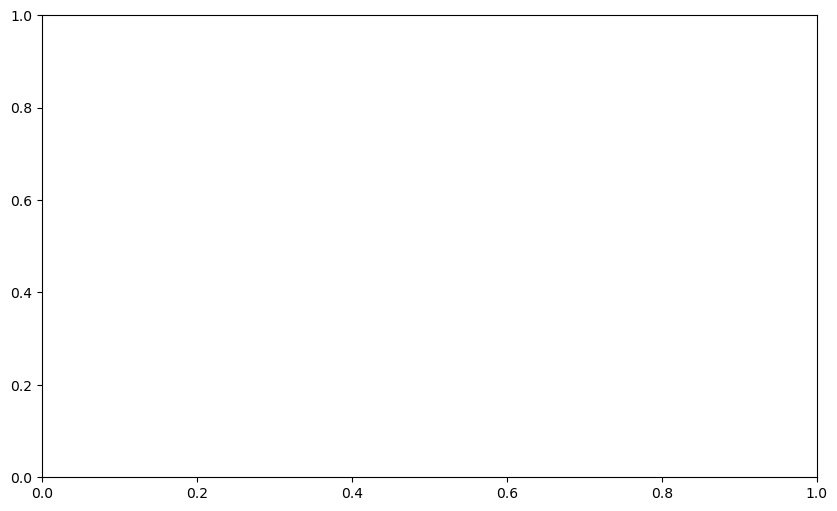

In [ ]:
# TODO: Value counts and analysis
site_counts = df['site'].value_counts()
intervention_group_count = df['intervention_group'].value_counts()
#site_vs_intervention = plot_crosstab(df['site', 'intervention_group'],'title')
mean_age = df.groupby('site')['age'].mean()

In [ ]:
# TODO: Save output
site_counts.to_csv('output/q4_site_counts.csv')


## Summary

Write 2-3 sentences about what you learned from exploring this dataset.

**Your summary here:**

TODO: Write your observations
